In [4]:
# general imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

#from utils import plot, plot_ts, plot_rws, plot_error, unroll_ts

In [5]:
from orion.data import load_signal, load_anomalies

In [6]:
signal = 'machine_temperature_system_failure'

# load signal
df = load_signal(signal)

# load ground truth anomalies
known_anomalies = load_anomalies(signal)

df.head(5)

,timestamp,value
0,1386015300,73.967322
1,1386015600,74.935882
2,1386015900,76.124162
3,1386016200,78.140707
4,1386016500,79.329836


In [9]:
from datetime import datetime
import matplotlib.dates as mdates
def convert_date(timelist):
    converted = list()
    for x in timelist:
        converted.append(datetime.fromtimestamp(x))
    return converted

def convert_date_single(x):
    return datetime.fromtimestamp(x)
def plot(dfs, anomalies=[]):
    """ Line plot for time series.
    
    This function plots time series and highlights anomalous regions.
    The first anomaly in anomalies is considered the ground truth.
    
    Args:
        dfs (list or `pd.DataFrame`): List of time series in `pd.DataFrame`.
            Or a single dataframe. All dataframes must have the same shape.
        anomalies (list): List of anomalies in tuple format.
    """    
    if isinstance(dfs, pd.DataFrame):
        dfs = [dfs]
        
    if not isinstance(anomalies, list):
        anomalies = [anomalies]
        
    df = dfs[0]
    time = convert_date(df['timestamp'])
    months = mdates.MonthLocator()  # every month
    days = mdates.DayLocator() # every day

    month_fmt = mdates.DateFormatter('%b')

    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(111)

    for df in dfs:
        plt.plot(time, df['value'])

    colors = ['red'] + ['green'] * (len(anomalies) - 1)
    for i, anomaly in enumerate(anomalies):
        if not isinstance(anomaly, list):
            anomaly = list(anomaly[['start', 'end']].itertuples(index=False))
        
        for _, anom in enumerate(anomaly):
            t1 = convert_date_single(anom[0])
            t2 = convert_date_single(anom[1])
            plt.axvspan(t1, t2, color=colors[i], alpha=0.2)

    plt.title('Machine Temprature Failure', size=34)
    plt.ylabel('Temperature', size=30)
    plt.xlabel('Time', size=30)
    plt.xticks(size=26)
    plt.yticks(size=26)
    plt.xlim([time[0], time[-1]])

    # format xticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(month_fmt)
    ax.xaxis.set_minor_locator(days)
    

    # format yticks
    ylabels = ['{:,.01f}'.format(x) + 'C' for x in ax.get_yticks()/1]
    ax.set_yticklabels(ylabels)

    # format yticks
  #  ylabels = ['value']
  #  ax.set_yticklabels(ylabels)
    
    plt.show()

C:\Users\Raunak\.conda\envs\orion\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


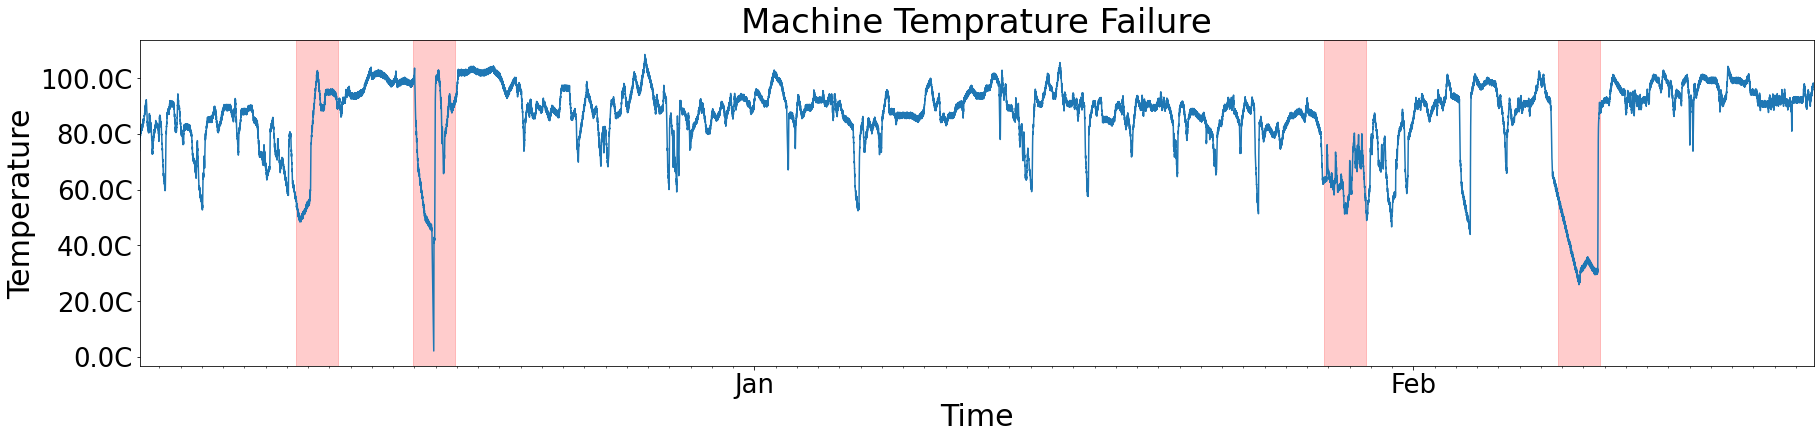

In [10]:
plot(df, known_anomalies)

---

In [11]:
from orion import Orion


orion = Orion(
    pipeline='tadgan.json'
)

anomalies = orion.fit_detect(df)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 1/35, [Dx loss: [-1.540151   -4.7912965   1.1223232   0.21288216]] [Dz loss: [ 2.570894   -0.3376043   2.1349418   0.07735569]] [G loss: [ 1.2725252 -1.0457813 -0.2048749  0.2523181]]
Epoch: 2/35, [Dx loss: [-0.8265933   0.00632146 -1.1932923   0.03603774]] [Dz loss: [-12.094464   -0.9836868 -19.114508    0.8003731]] [G loss: [28.4682     2.4923024 23.63825    0.2337647]]
Epoch: 3/35, [Dx loss: [ -4.408445     7.4319606  -12.434308     0.05939022]] [Dz loss: [-1.520113    0.37130952 -2.5355718   0.06441497]] [G loss: [18.262772  12.099371   3.3510587  0.2812344]]
Epoch: 4/35, [Dx loss: [ -4.6400137    8.52293    -13.699717     0.05367732]] [Dz loss: [-6.02417    -0.06865791 -7.3596296   0.14041169]] [G loss: [25.083124   13.762433    8.569332    0.27513555]]
Epoch: 5/35, [Dx loss: [ -4.6340265   11.077985   -16.216305     0.05042941]] [Dz loss: [-2.9963298   0.23866428 -4.299542    0.10645477]] [G loss: [24.336346   16.28919     5.14983     0.28973228]]
Epoch: 6/35, [Dx loss: [ 

Let's visualize the results.

C:\Users\Raunak\.conda\envs\orion\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


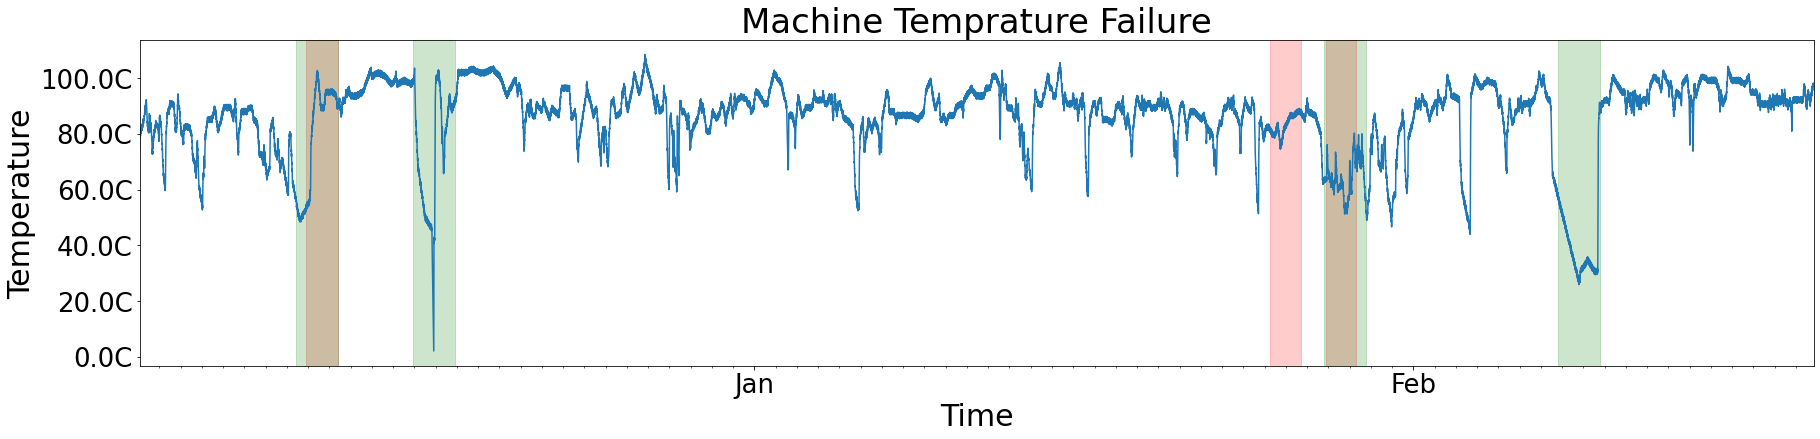

,start,end,severity
0,1386690300,1386819900,0.401008
1,1390608900,1390734900,0.522494
2,1390837500,1390959900,0.319820


In [13]:
plot(df, [anomalies, known_anomalies])
anomalies.head(5)

In [14]:
def time_segments_aggregate(X, interval, time_column, method=['mean']):
    """Aggregate values over given time span.
    Args:
        X (ndarray or pandas.DataFrame):
            N-dimensional sequence of values.
        interval (int):
            Integer denoting time span to compute aggregation of.
        time_column (int):
            Column of X that contains time values.
        method (str or list):
            Optional. String describing aggregation method or list of strings describing multiple
            aggregation methods. If not given, `mean` is used.
    Returns:
        ndarray, ndarray:
            * Sequence of aggregated values, one column for each aggregation method.
            * Sequence of index values (first index of each aggregated segment).
    """
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)

    X = X.sort_values(time_column).set_index(time_column)

    if isinstance(method, str):
        method = [method]

    start_ts = X.index.values[0]
    max_ts = X.index.values[-1]

    values = list()
    index = list()
    while start_ts <= max_ts:
        end_ts = start_ts + interval
        subset = X.loc[start_ts:end_ts - 1]
        aggregated = [
            getattr(subset, agg)(skipna=True).values
            for agg in method
        ]
        values.append(np.concatenate(aggregated))
        index.append(start_ts)
        start_ts = end_ts

    return np.asarray(values), np.asarray(index)

X, index = time_segments_aggregate(df, interval=1800, time_column='timestamp')

In [16]:
imp = SimpleImputer()
X = imp.fit_transform(X)

In [17]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [19]:
def plot_ts(X, labels=None):
    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(111)
    
    if not isinstance(X, list):
        X = [X]
  
    for x in X:
        t = range(len(x))
        plt.plot(t, x)
    
    plt.title('Machine Temprature Failure', size=34)
    plt.ylabel('# Temperature', size=30)
    plt.xlabel('Time', size=30)
    plt.xticks(size=26)
    plt.yticks(size=26)
    plt.xlim([t[0], t[-1]])
    ?
    if labels:
        plt.legend(labels=labels, loc=1, prop={'size': 26})
    
    plt.show()

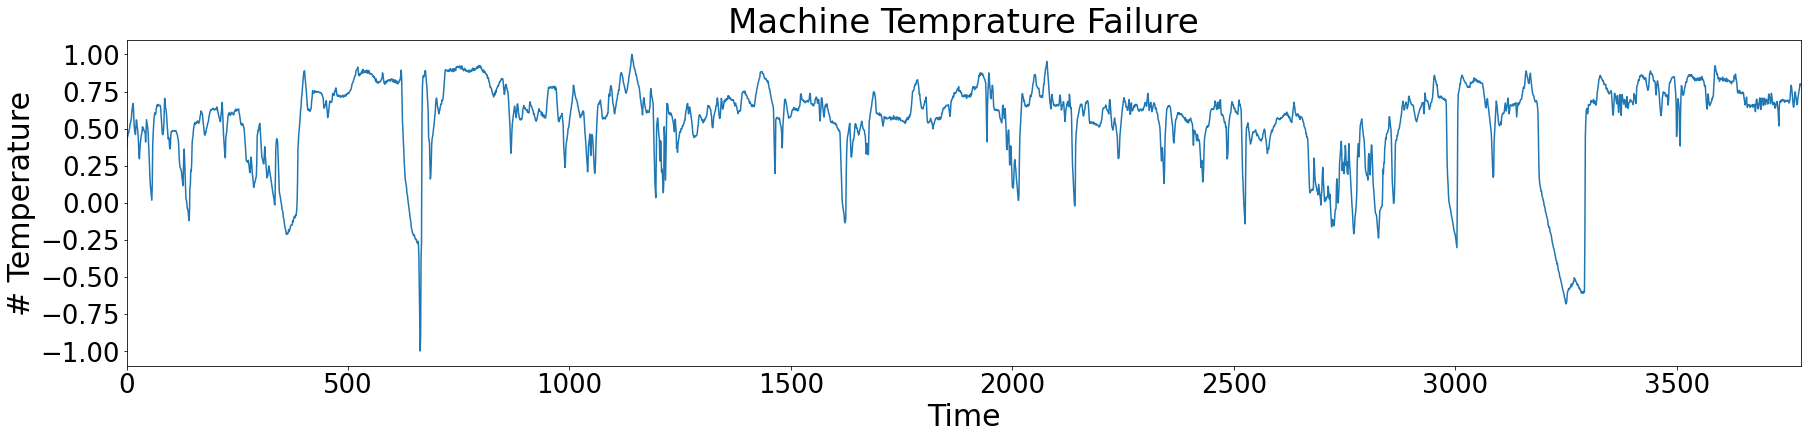

In [20]:
plot_ts(X)

In [21]:
def rolling_window_sequences(X, index, window_size, target_size, step_size, target_column,
                             drop=None, drop_windows=False):
    """Create rolling window sequences out of time series data.
    The function creates an array of input sequences and an array of target sequences by rolling
    over the input sequence with a specified window.
    Optionally, certain values can be dropped from the sequences.
    Args:
        X (ndarray):
            N-dimensional sequence to iterate over.
        index (ndarray):
            Array containing the index values of X.
        window_size (int):
            Length of the input sequences.
        target_size (int):
            Length of the target sequences.
        step_size (int):
            Indicating the number of steps to move the window forward each round.
        target_column (int):
            Indicating which column of X is the target.
        drop (ndarray or None or str or float or bool):
            Optional. Array of boolean values indicating which values of X are invalid, or value
            indicating which value should be dropped. If not given, `None` is used.
        drop_windows (bool):
            Optional. Indicates whether the dropping functionality should be enabled. If not
            given, `False` is used.
    Returns:
        ndarray, ndarray, ndarray, ndarray:
            * input sequences.
            * target sequences.
            * first index value of each input sequence.
            * first index value of each target sequence.
    """
    out_X = list()
    out_y = list()
    X_index = list()
    y_index = list()
    target = X[:, target_column]

    if drop_windows:
        if hasattr(drop, '__len__') and (not isinstance(drop, str)):
            if len(drop) != len(X):
                raise Exception('Arrays `drop` and `X` must be of the same length.')
        else:
            if isinstance(drop, float) and np.isnan(drop):
                drop = np.isnan(X)
            else:
                drop = X == drop

    start = 0
    max_start = len(X) - window_size - target_size + 1
    while start < max_start:
        end = start + window_size

        if drop_windows:
            drop_window = drop[start:end + target_size]
            to_drop = np.where(drop_window)[0]
            if to_drop.size:
                start += to_drop[-1] + 1
                continue

        out_X.append(X[start:end])
        out_y.append(target[end:end + target_size])
        X_index.append(index[start])
        y_index.append(index[end])
        start = start + step_size

    return np.asarray(out_X), np.asarray(out_y), np.asarray(X_index), np.asarray(y_index)

X, y, X_index, y_index = rolling_window_sequences(X, index, 
                                                  window_size=100, 
                                                  target_size=1, 
                                                  step_size=1,
                                                  target_column=0)

In [22]:
print("Training data input shape: {}".format(X.shape))
print("Training data index shape: {}".format(X_index.shape))
print("Training y shape: {}".format(y.shape))
print("Training y index shape: {}".format(y_index.shape))

Training data input shape: (3681, 100, 1)
Training data index shape: (3681,)
Training y shape: (3681, 1)
Training y index shape: (3681,)


In [23]:
def plot_rws(X, window=100, k=5, lim=1000):
    shift = 75
    X = X[window:]
    t = range(len(X))
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    
    num_figs = int(np.ceil(k / 5)) + 1
    fig = plt.figure(figsize=(15, num_figs * 2))
    
    j = 0
    ax = fig.add_subplot(num_figs, 5, j+1)
    idx = t[j: window + j]
    ax.plot(idx, X[j], lw=2, color=colors[j])
    plt.title("window %d" % j, size=16)
    plt.ylim([-1, 1])
    
    j = 1
    ax = fig.add_subplot(num_figs, 5, j+1)
    idx = t[j: window + j]
    ax.plot(idx, X[j], lw=2, color=colors[j])
    ax.set_yticklabels([])
    plt.title("window %d" % j, size=16)
    plt.ylim([-1, 1])
        
    for i in range(2, k):
        j = i * shift
        idx = t[j: window + j]
        
        ax = fig.add_subplot(num_figs, 5, i+1)
        ax.plot(idx, X[j], lw=2, color=colors[i+1])
        ax.set_yticklabels([])
        plt.title("window %d" % j, size=16)
        plt.ylim([-1, 1])
    
    plt.tight_layout()
    plt.show()

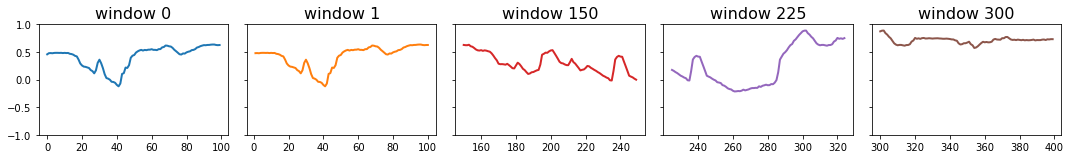

In [24]:
plot_rws(X)

In [29]:
from model import hyperparameters
from orion.primitives.tadgan import TadGAN

hyperparameters["epochs"] = 20
hyperparameters["shape"] = (100, 1) # based on the window size
hyperparameters["optimizer"] = "keras.optimizers.Adam"
hyperparameters["learning_rate"] = 0.0005
hyperparameters["latent_dim"] = 20
hyperparameters["batch_size"] = 64

tgan = TadGAN(**hyperparameters)
tgan.fit(X)

C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning:

Epoch: 1/20, [Dx loss: [-1.8798252  -5.6841645   2.2115262   0.15928139]] [Dz loss: [-1.7181984  -1.6390239  -1.1670675   0.10878929]] [G loss: [ 2.7832174  -2.29646     2.8326364   0.22470407]]
Epoch: 2/20, [Dx loss: [-0.9705933  -1.3451416  -0.0279866   0.04025352]] [Dz loss: [-4.709972   -1.607666   -5.629763    0.25274572]] [G loss: [10.292904    1.358027    6.3640842   0.25707924]]
Epoch: 3/20, [Dx loss: [ -4.523726     6.735868   -11.794283     0.05346862]] [Dz loss: [-4.0633497  -1.490511   -3.84245     0.12696114]] [G loss: [20.707947   12.059588    5.7932053   0.28551528]]
Epoch: 4/20, [Dx loss: [ -4.6090813    5.27634    -10.427177     0.05417537]] [Dz loss: [-3.3655517  -1.0040925  -4.0153894   0.16539289]] [G loss: [18.278166   10.502132    4.8516254   0.29244077]]
Epoch: 5/20, [Dx loss: [ -4.7337246    6.384536   -11.628992     0.05107298]] [Dz loss: [-4.296959   -0.60730034 -4.6763363   0.09866787]] [G loss: [20.376244  11.816116   5.6470547  0.2913075]]
Epoch: 6/20, [Dx 

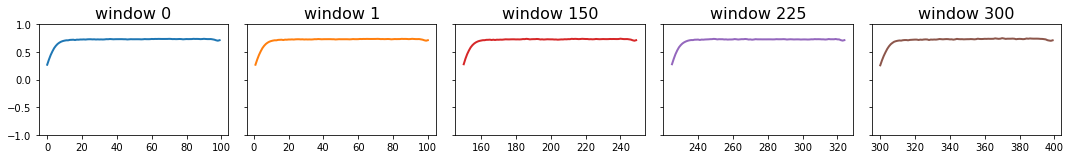

In [30]:
# reconstruct
X_hat, critic = tgan.predict(X)

# visualize X_hat
plot_rws(X_hat)

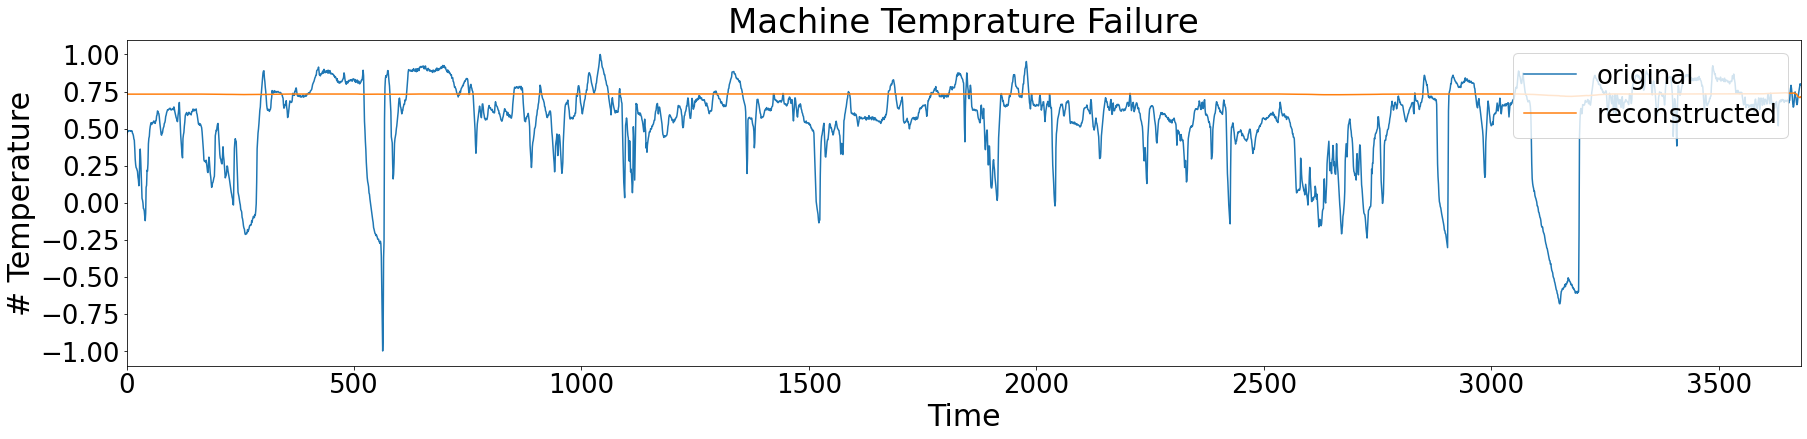

In [32]:
# flatten the predicted windows
y_hat = unroll_ts(X_hat)

# plot the time series
plot_ts([y, y_hat], labels=['original', 'reconstructed'])

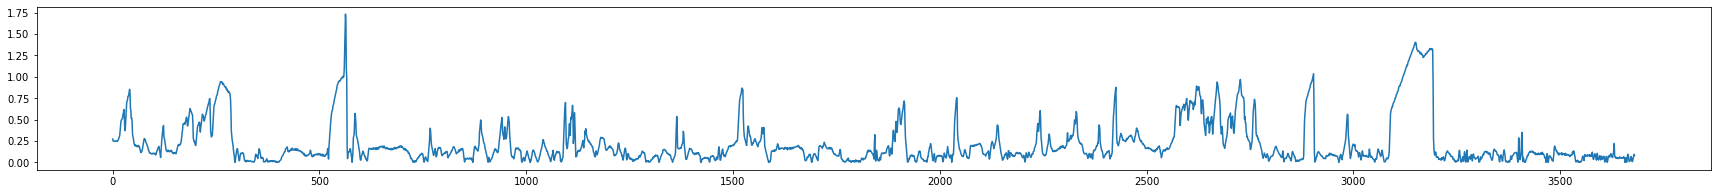

In [33]:
# pair-wise error calculation
error = np.zeros(shape=y.shape)
length = y.shape[0]
for i in range(length):
    error[i] = abs(y_hat[i] - y[i])

# visualize the error curve
fig = plt.figure(figsize=(30, 3))
plt.plot(error)
plt.show()

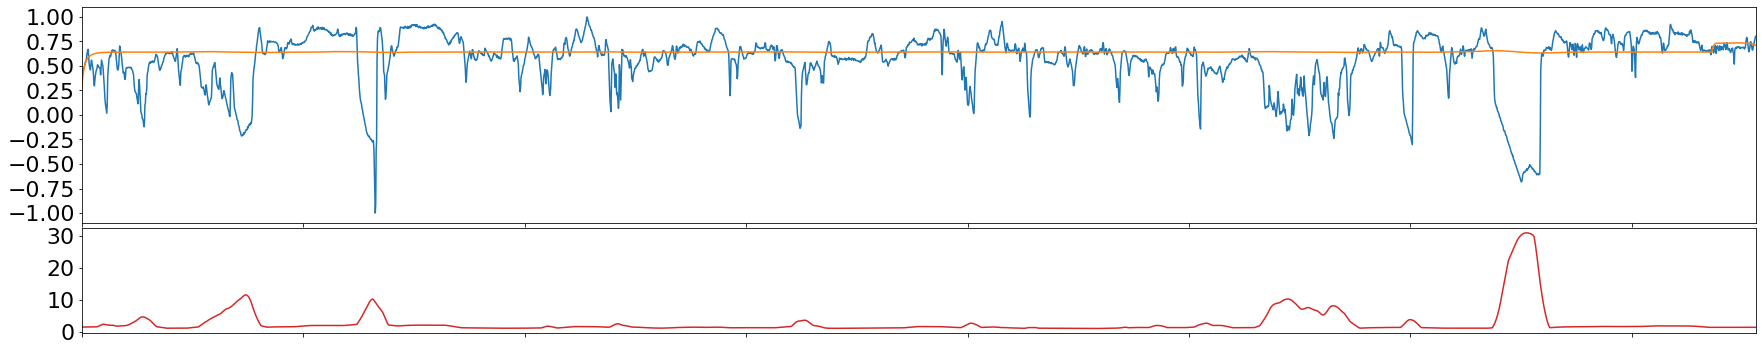

In [34]:
from orion.primitives.tadgan import score_anomalies

error, true_index, true, pred = score_anomalies(X, X_hat, critic, X_index, rec_error_type="dtw", comb="mult")
pred = np.array(pred).mean(axis=2)

# visualize the error curve
plot_error([[true, pred], error])

In [35]:
# threshold
thresh = 10

intervals = list()

i = 0
max_start = len(error)
while i < max_start:
    j = i
    start = index[i]
    while error[i] > thresh:
        i += 1
    
    end = index[i]
    if start != end:
        intervals.append((start, end, np.mean(error[j: i+1])))
        
    i += 1
        
intervals

[(1386656100, 1386701100, 10.94133469885057),
 (1387192500, 1387203300, 10.1296574616814),
 (1390902300, 1390931100, 10.183289736257262),
 (1391784300, 1391953500, 24.62464266637904)]

C:\Users\Raunak\.conda\envs\orion\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


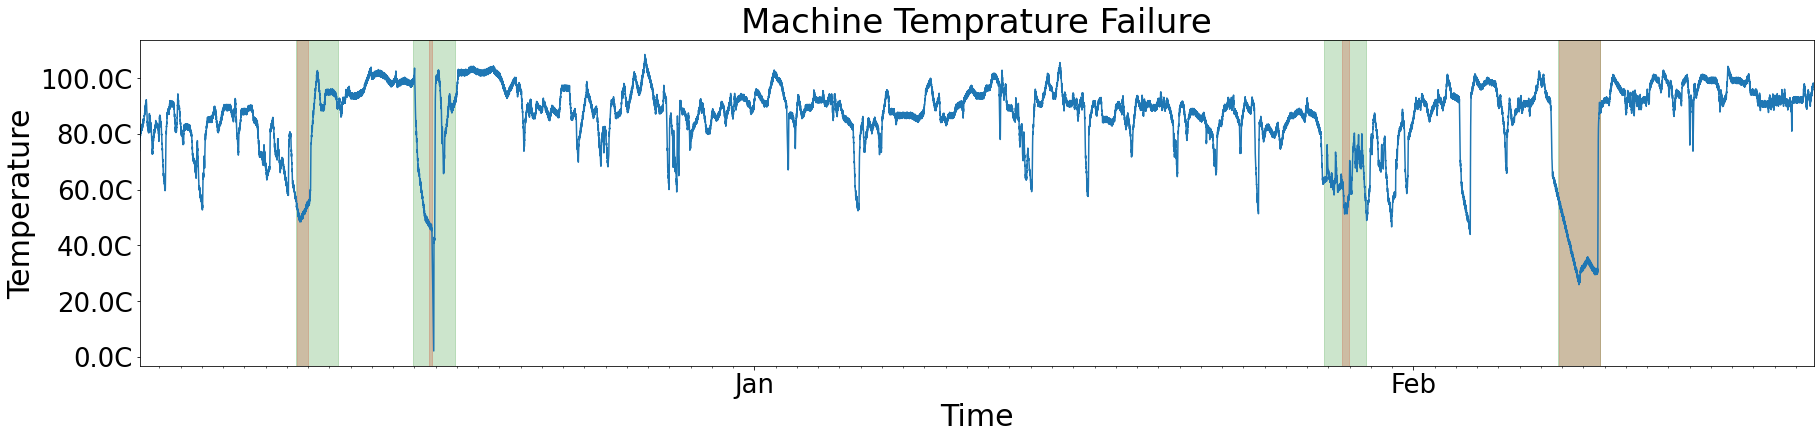

In [36]:
anomalies = pd.DataFrame(intervals, columns=['start', 'end', 'score'])
plot(df, [anomalies, known_anomalies])

In [37]:
from orion.primitives.timeseries_anomalies import find_anomalies

# find anomalies
intervals = find_anomalies(error, index, 
                           window_size_portion=0.33, 
                           window_step_size_portion=0.1, 
                           fixed_threshold=True)
intervals

array([[1.38658590e+09, 1.38679650e+09, 1.53134874e-01],
       [1.38708270e+09, 1.38731670e+09, 7.53087904e-01],
       [1.38883050e+09, 1.38905910e+09, 2.27627932e-01],
       [1.39079610e+09, 1.39095990e+09, 2.79734363e-01],
       [1.39172130e+09, 1.39200210e+09, 2.02999086e-01]])

C:\Users\Raunak\.conda\envs\orion\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


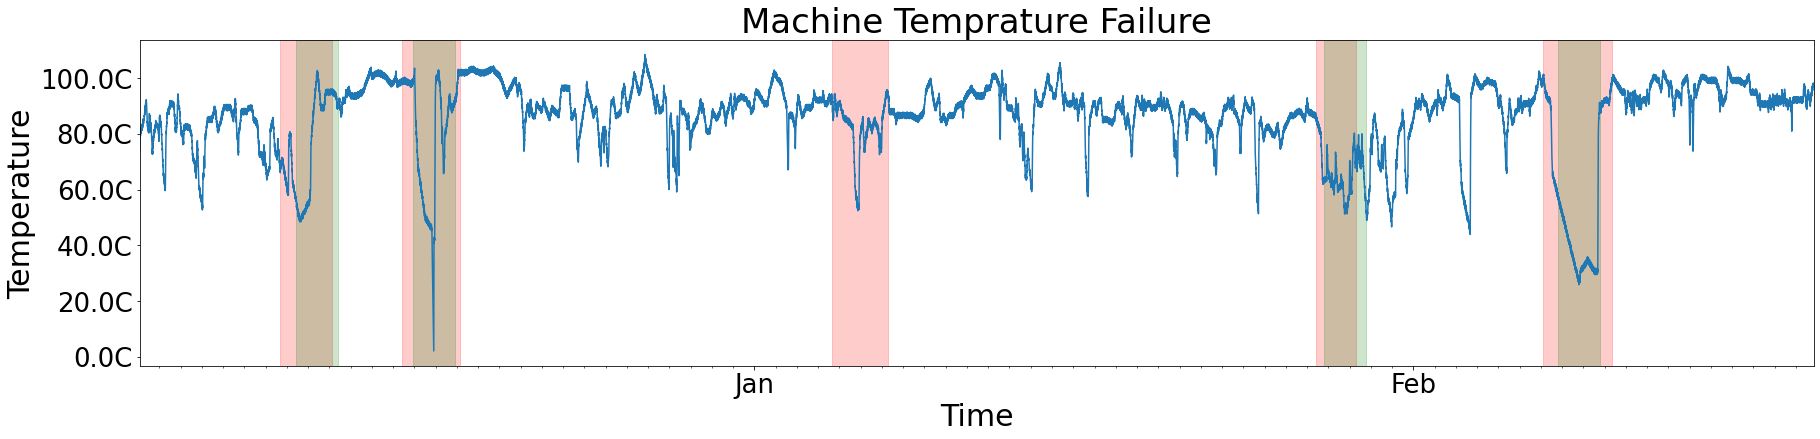

In [38]:
# visualize the result
anomalies = pd.DataFrame(intervals, columns=['start', 'end', 'score'])
plot(df, [anomalies, known_anomalies])

In [39]:
from orion import Orion

parameters = {
    "mlprimitives.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            "interval": 3600 # hour level
        },
    'orion.primitives.tadgan.TadGAN#1': {
        'epochs': 25,
        }
}

orion = Orion(
    'tadgan.json',
    parameters
)

anomalies = orion.fit_detect(df)

C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning:

Epoch: 1/25, [Dx loss: [ 1.7090726  -1.7891163   0.28014714  0.32180417]] [Dz loss: [ 1.9048635  -0.53269625  1.5562248   0.08813347]] [G loss: [ 1.5322217  -0.42046493 -1.5086892   0.34613758]]
Epoch: 2/25, [Dx loss: [-3.7425044  -7.8658953   3.6055439   0.05178468]] [Dz loss: [ 0.35051456 -1.4899868   1.0668731   0.07736281]] [G loss: [-0.14883976 -3.843116    1.8926598   0.18016168]]
Epoch: 3/25, [Dx loss: [ 0.05263365 -8.327773    8.264286    0.01161222]] [Dz loss: [-13.616254    -2.2330742  -18.608824     0.72256416]] [G loss: [16.282162 -8.070009 21.95311   0.239906]]
Epoch: 4/25, [Dx loss: [-1.6190562   3.2741022  -5.523357    0.06301986]] [Dz loss: [-3.2912474 -1.4832426 -5.700099   0.3892095]] [G loss: [17.446545   8.412383   6.289206   0.2744955]]
Epoch: 5/25, [Dx loss: [ -4.216627    7.189192  -11.921032    0.0515212]] [Dz loss: [-1.2324964  -0.78470904 -0.8442574   0.03964701]] [G loss: [16.663279   12.291563    1.8609737   0.25107402]]
Epoch: 6/25, [Dx loss: [ -2.8033078  

C:\Users\Raunak\.conda\envs\orion\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


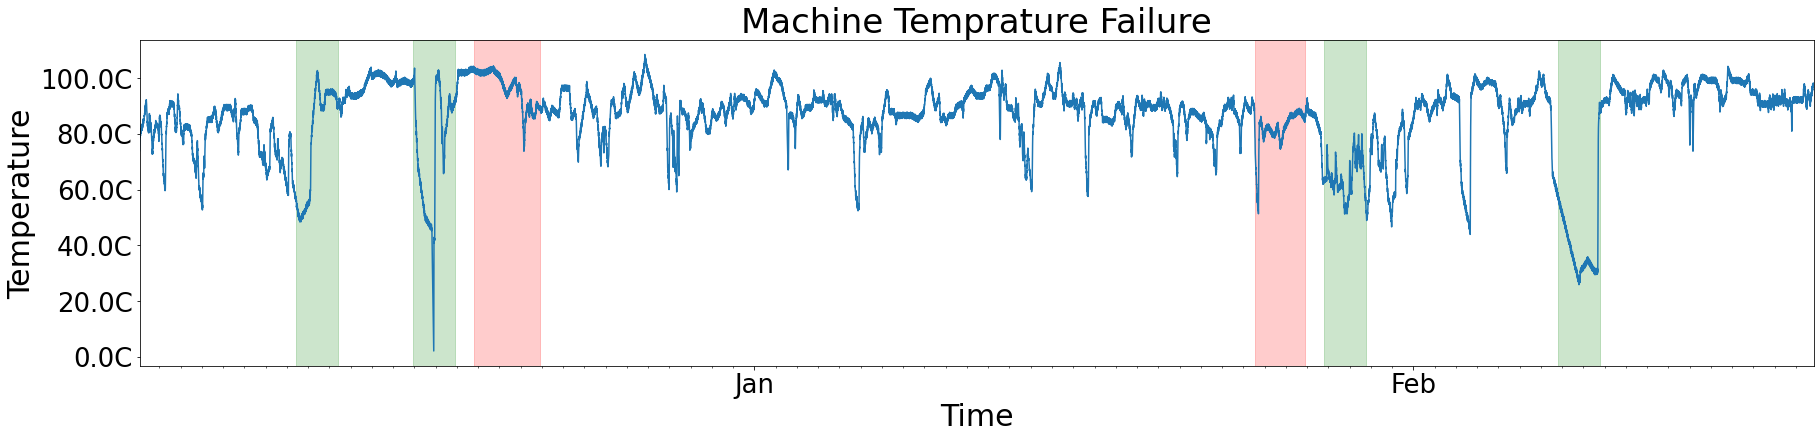

In [40]:
plot(df, [anomalies, known_anomalies])

In [41]:
import numpy as np

# to reproduce the same dummy signal
np.random.seed(0)

# dummy data
start, end = (1, 20)
signal = np.random.rand(end - start, 1)

ground_truth = [
    (5, 8),
    (12, 13),
    (17, 18)
]

anomalies = [
    (5, 8),
    (12, 15)
]

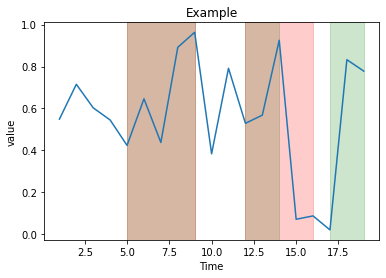

In [42]:
import matplotlib.pyplot as plt

time = range(start, end)
plt.plot(time, signal)

# ground truth
for i, (t1, t2) in enumerate(ground_truth):
    plt.axvspan(t1, t2+1, color="g", alpha=0.2, label="ground_truth")

# detected
for i, (t1, t2) in enumerate(anomalies):
    plt.axvspan(t1, t2+1, color="r", alpha=0.2, label="detected")

    
plt.title("Example")
plt.xlabel("Time")
plt.ylabel("value")
plt.show()

In [43]:
from orion.evaluation.contextual import contextual_accuracy, contextual_f1_score

accuracy = contextual_accuracy(ground_truth, anomalies, start=start, end=end)
f1_score = contextual_f1_score(ground_truth, anomalies, start=start, end=end)

print("Accuracy score = {:0.3f}".format(accuracy))
print("F1 score = {:0.3f}".format(f1_score))

Accuracy score = 0.789
F1 score = 0.750


In [44]:
f1_score = contextual_f1_score(ground_truth, anomalies, start=start, end=end, weighted=False)

print("F1 score = {:0.3f}".format(f1_score))

F1 score = 0.800


In [ ]:
from orion import Orion
from orion.data import load_signal, load_anomalies
from orion.evaluation.contextual import contextual_accuracy, contextual_f1_score, contextual_precision

metrics = [
    'f1',
    'recall',
    'precision',
]

orion = Orion(
    'tadgan.json'
)

signal = 'machine_temperature_system_failure'

# load signal
df = load_signal(signal)

# load ground truth anomalies
ground_truth = load_anomalies(signal)

scores = orion.evaluate(df, ground_truth, fit=True, metrics=metrics)

C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Raunak\.conda\envs\orion\lib\site-packages\keras\engine\training.py:297: UserWarning:

Epoch: 1/35, [Dx loss: [-1.9882827  -5.209009    1.3401153   0.18806118]] [Dz loss: [-0.54638845 -1.0863235  -0.5244002   0.1064336 ]] [G loss: [ 3.0414276 -1.3440158  2.1530862  0.2232357]]
Epoch: 2/35, [Dx loss: [-1.1102246   0.13420813 -1.6994056   0.04549726]] [Dz loss: [-5.713518   -1.2067382  -7.5343394   0.30275616]] [G loss: [13.803055    2.6767428   8.927811    0.21985006]]
Epoch: 3/35, [Dx loss: [ -4.469732     6.0159774  -11.051794     0.05660857]] [Dz loss: [-3.2025456  -0.76882803 -3.286658    0.08529402]] [G loss: [19.092285   11.316537    5.01598     0.27597678]]
Epoch: 4/35, [Dx loss: [ -4.571108     5.515868   -10.611714     0.05247387]] [Dz loss: [-4.351562   -0.84844834 -5.364271    0.18611579]] [G loss: [19.472923  10.465332   6.1538587  0.2853731]]
Epoch: 5/35, [Dx loss: [ -3.9172933    6.0740724  -10.450713     0.04593481]] [Dz loss: [-3.8911288  -0.9715844  -4.1071053   0.11875605]] [G loss: [17.996695  10.404727   4.938822   0.2653144]]
Epoch: 6/35, [Dx loss: [ 

In [ ]:
scores